In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

c:\Users\HP\anaconda3\envs\pn_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)
#look to optimal_skills to compare datafram

In [4]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [5]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [6]:
df_jobs.merge(df_companies,on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [9]:
df_USA5=df[df['job_country'] == 'United States'].copy()
df_USA5['job_posted_month']=df_USA5['job_posted_date'].dt.strftime('%B')

In [10]:
df_Usa_pivot=df_USA5.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_Usa_pivot.reset_index(inplace=True)
df_Usa_pivot['month_no']=pd.to_datetime(df_Usa_pivot['job_posted_month'], format='%B').dt.month
df_Usa_pivot.sort_values('month_no',inplace=True)
#finally we order dataframe by job_posted_monthly
df_Usa_pivot.set_index('job_posted_month', inplace=True)
df_Usa_pivot.drop(columns='month_no', inplace=True)

In [11]:
df_Usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [12]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [14]:
#frist :assign to variable
df_merge=df_Usa_pivot.merge(df_US_software_pivot,on='job_posted_month')
df_merge

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [15]:
#https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## we want to know plot five jobs based on count 

In [7]:
df_merge

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [9]:
top_5=df_merge.sum().sort_values(ascending=False).head()
top_5
#Plotting top_5 as a Series  directlylooked "awful"  due to overlapping labels or no time trend
#because we use job_title as index not months
# Using the list to filter df_merge makes months as index

Front-End Developer     151067
Back-End Developer      104700
Full-Stack Developer     75873
Data Analyst             67816
Data Scientist           58830
dtype: int64

In [10]:
#i want to convert it to list 
top_5=df_merge.sum().sort_values(ascending=False).head().index
top_5 #The data type is pandas Index object we need convert it to list 

Index(['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer',
       'Data Analyst', 'Data Scientist'],
      dtype='object')

In [13]:
#to make my code more readable 
top_5=(df_merge
    .sum()
    .sort_values(ascending=False).
    head()
    .index
    .to_list())
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

In [14]:
df_merge[top_5]

,Front-End Developer,Back-End Developer,Full-Stack Developer,Data Analyst,Data Scientist
job_posted_month,,,,,
January,13619,9827,5108,8494,6915
February,11456,9116,7298,6124,4956
March,11102,8178,5814,6218,4779
April,14037,9209,7232,6049,4867
May,12126,8864,6718,4993,4377
June,12003,8065,5902,5683,4645
July,11914,8061,6839,5201,4876
August,11571,8191,7413,6634,6318
September,14016,8447,6139,4639,4568


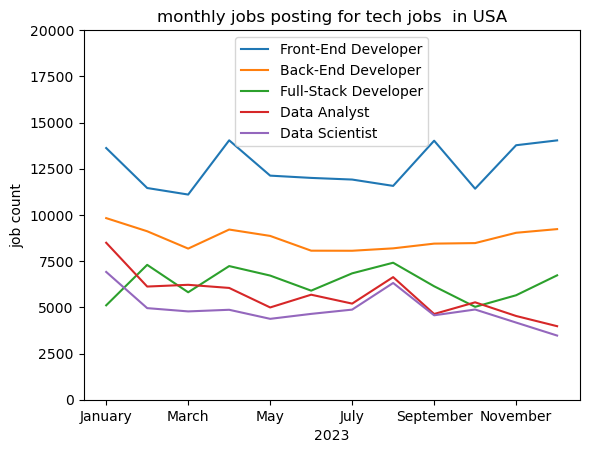

In [15]:
df_merge[top_5].plot(kind='line') #df_merge[top_5] consider series has index and value 
plt.xlabel('2023')
plt.ylabel('job count')
plt.ylim(0,20000) #y limit shifted to 200000
plt.title('monthly jobs posting for tech jobs  in USA')
plt.legend()
plt.show()
#we see some trends:front end and back end developers have higher job demand 

## How df.plot(kind='line') works:

In [ ]:
#we prefer to plot series becaue it smaller or plot with few columns than df like df_merge[top_5]
#The list top_5 tells pandas which columns to select from df_merge.
# In short**: The list `top_5` tells pandas to extract those five job title columns from `df_merge
# and `.plot(kind='line')` uses their values (e.g., job posting counts) to create a line plot, 
# with the DataFrame’s index (e.g., `job_posted_monthly`) as the x-axis.


## notes

In [ ]:

#any data structure or object(like a DataFrame, list,dictionary) that can have an index (a label or position identifying a specific element) and a value (the actual data associated with that index)
#object—any instance of a class or DataFrame, list, string has attribute and method 
# attribute is a property data associated with the object (e.g., df_Usa_pivot.shape for a DataFrame's dimensions)
# df_merge.sum(): Calculates the sum of numeric values in each column of df
#df_merge.value_counts(): never add anything, Counts the frequency of unique values or combinations of values 

#The list top_5 tells pandas which columns to select from df_merge.
# they’re already in the DataFrame’s structure (index for months, columns for values).
